# Employee Exit Survey - Data Cleaning and Analysis

#### Table Of Contents
* [Introduction](#first-bullet)
* [Dataset Exploration](#second-bullet)
* [Data Cleaning](#third-bullet)
* [Data Analysis](#4th)
* [Conclusion](#5th-bullet)

#### Introduction <a class="anchor" id="first-bullet"></a>

We'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We will try to answer the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

#### Dataset Exploration <a class="anchor" id="second-bullet"></a>

In [3]:
#Import libraries
import pandas as pd, numpy as np #import libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Read csv files into dataframe
dete_survey = pd.read_csv('dete_survey.csv')

In [ ]:
#Read csv files
tafe_survey = pd.read_csv('tafe_survey.csv') 

In [ ]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

There are 822 rows and 56 columns. There is a good spread of str objects and booleans.

In [ ]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

We can see quite a number of null values. We will have to look into these columns.

In [ ]:
#Check the first 5 rows
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Check info
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [ ]:
#Check for null values
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [ ]:
#Check the first 5 rows
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.

Each dataframe contains many of the same columns, but the column names are different.

There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

#### Data Cleaning <a class="anchor" id="third-bullet"></a>

In [ ]:
#Read the dete_survey.csv file again removing Not Stated values
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated') 

In [ ]:
#Drop columns that we don't need for analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1) 

In [ ]:
#Drop columns that we don't need for analysis
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1) 

Columns that we will use for analysis:

|dete_survey     | tafe_survey                   | Definition                                          |
|----------------|-------------------------------|-----------------------------------------------------|
|ID	             | Record ID	                 | An id used to identify the participant of the survey|
|SeparationType  | Reason for ceasing employment | The reason why the participant's employment ended|
|Cease Date      | CESSATION YEAR                | The year or month the participant's employment ended|
|DETE Start Date |                               | The year the participant began employment with the DETE|
|LengthofServiceOverall.Overall| Length of Service at Institute|  The length of the person's employment (in years)|
|Age             | CurrentAge                    | The age of the participant|
|Gender          | Gender. What is your Gender?  | The gender of the participant|

In [ ]:
#Standardize dete_survey columns
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip(' ').str.replace(' ','_')

In [ ]:
#Check our column names
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [ ]:
#Update tafe_survey column names to equivalent in dete_survey
original = ['Record ID','CESSATION YEAR', 'Reason for ceasing employment','Gender. What is your Gender?','CurrentAge. Current Age','Employment Type. Employment Type','Classification. Classification','LengthofServiceOverall. Overall Length of Service at Institute (in years)','LengthofServiceCurrent. Length of Service at current workplace (in years)']
new = ['id','cease_date','separationtype','gender','age','employment_status','position','institute_service','role_service']
for x,y in zip(original, new):
    tafe_survey_updated = tafe_survey_updated.rename({x:y}, axis=1)

In [ ]:
#Check columns names
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

#### We are looking specifically into resignations to answer our questions. Next we clean the Resignation column.

In [ ]:
#Check resignation column uniques - dete survey
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [ ]:
#Select for rows with Resignation separationtype - dete_survey
resignation_types = ['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate']
sep_bool = dete_survey_updated['separationtype'].isin(resignation_types)
dete_resignations = dete_survey_updated[sep_bool].copy()

In [ ]:
#Counts of each resignation type
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [ ]:
#Check resignation column uniques - tafe survey
tafe_survey_updated['separationtype'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [ ]:
#Select for rows with Resignation - tafe survey
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

In [ ]:
#Counts of each resignation type
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

#### Next we check the date data

Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [ ]:
#Check date data in dete survey
dete_resignations['cease_date'].value_counts(dropna=False) 

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [ ]:
#Clean date data by extract date numbers
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r"([2][0-9]{3})") 

In [ ]:
#Convert to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float) 

In [ ]:
#Double check the date data in dete_survey
dete_resignations['cease_date'].value_counts(dropna=False) 

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [ ]:
#Check the start dates in dete survey
dete_resignations['dete_start_date'].value_counts(dropna=False) 

NaN       28
2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1998.0     6
2002.0     6
1994.0     6
1996.0     6
1992.0     6
2003.0     6
1980.0     5
1990.0     5
1993.0     5
1997.0     5
1989.0     4
1995.0     4
1988.0     4
1991.0     4
2001.0     3
1986.0     3
1985.0     3
1976.0     2
1983.0     2
1974.0     2
1963.0     1
1972.0     1
1984.0     1
1975.0     1
1973.0     1
1987.0     1
1982.0     1
1971.0     1
1977.0     1
Name: dete_start_date, dtype: int64

In [ ]:
#Check tafe_survey
tafe_resignations['cease_date'].value_counts() 

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

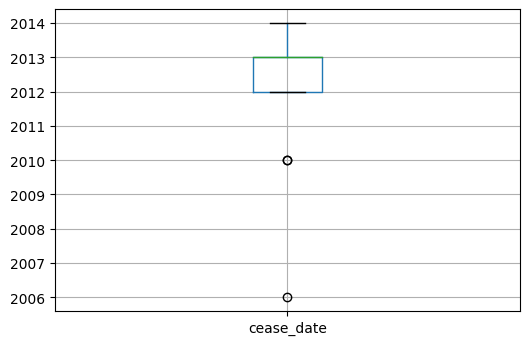

In [ ]:
#Check spread of values and outliers
dete_resignations.boxplot(column='cease_date') 

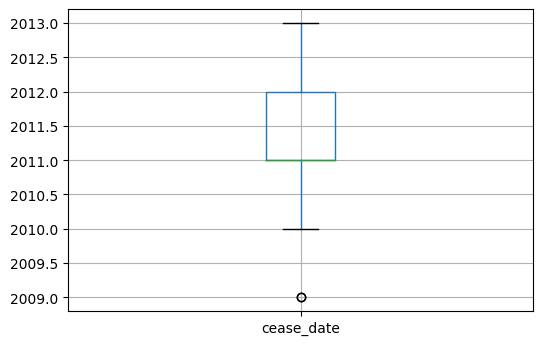

In [ ]:
#Check spread of values and outliers
tafe_resignations.boxplot(column='cease_date') 

There are only a couple of outliers and their values are within reason. We will keep the outliers in our analysis.

The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. 

In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

#### Create institute_service column in dete_resignations

In [ ]:
#Create service column in dete survey
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date'] 

#### Identifying Dissatisfied Employees <a class="anchor" id="4th-bullet"></a>

In [ ]:
#Check our tafe columns
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [ ]:
#Check our dete columns
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [ ]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [ ]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

There is quite a number of '-' input values. We will consider these as "False" or not dissatisfied. We will keep NaN as null values, and the rest as positive for dissatisfaction.

In [ ]:
#Create function to help us standarize each response in the columns to True, False, or NaN
def update_vals(col):
    if pd.isnull(col):
        return np.nan
    elif col == '-':
        return False
    else:
        return True

In [ ]:
#Apply our function to each dataframe element
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).copy()

In [ ]:
#Double check our changes
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [ ]:
#Double check our changes
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [ ]:
#Apply our function to the deter survey elements as well
dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].applymap(update_vals).copy()

In [ ]:
#Double check our changes
dete_resignations['job_dissatisfaction'].value_counts(dropna=False)

True    311
Name: job_dissatisfaction, dtype: int64

Next we want to combine the results into a new column that tracks dissatisfaction

In [ ]:
#Create function to screen through columns and combine them
def screen(series):
    if any(series): #If any element is True, return True
        return True
    elif not all(series): #If not all element are True, return False
        return False
    else: #All other situations return Nan
        return np.nan

In [ ]:
#Apply our function to tafe survey, taking in each row as a series (axis=1)
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].apply(screen, axis=1)

In [ ]:
#Check the results of our function
tafe_resignations['dissatisfied'].value_counts()

False    241
True      99
Name: dissatisfied, dtype: int64

In [ ]:
#Apply function to dete survey
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']].apply(screen, axis=1)

In [ ]:
#Check results
dete_resignations['dissatisfied'].value_counts()

True    311
Name: dissatisfied, dtype: int64

In [ ]:
#Rename
dete_resignations['institute'] = 'DETE'

In [ ]:
#Rename
tafe_resignations['institute'] = 'TAFE'

In [ ]:
#Combine our dataframes along the rows/stacked
combined = pd.concat([dete_resignations,tafe_resignations], axis=0)

In [ ]:
combined_updated = combined

In [ ]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


To analyze the data, we'll convert these numbers into categories. 

We'll use the definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [ ]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

In [ ]:
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r"\b(\d{1,2})\b")

In [ ]:
combined_updated['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [ ]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

In [ ]:
#Create function to sort numeric data in categories/bin
def map_exp(x):
    if pd.isnull(x):
        return np.nan
    elif x < 3:
        return "New"
    elif 3 <= x <= 6:
        return "Experienced"
    elif 7 <= x <= 10:
        return "Established"
    else:
        return "Veteran"

In [ ]:
#Apply our function
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_exp)

In [ ]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [ ]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     410
False    241
Name: dissatisfied, dtype: int64

#### Data Analysis <a class="anchor" id="4th"></a>

Now that our dataset is combined and cleaned, let's analyze our data.

In [ ]:
#Pivot table: Service vs Dissatisfaction
pv_dissatisfied = combined_updated.pivot_table(index='service_cat',values='dissatisfied',aggfunc=np.mean)
print(pv_dissatisfied)

             dissatisfied
service_cat              
Established      0.774194
Experienced      0.581395
New              0.476684
Veteran          0.808824


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

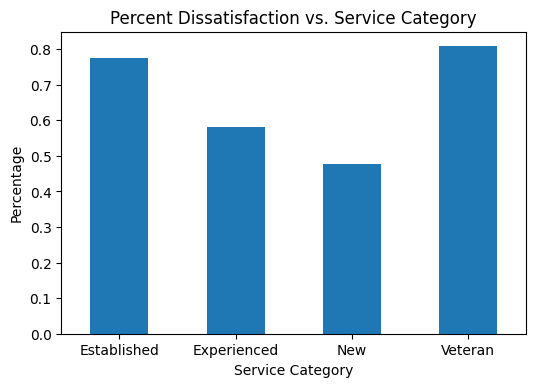

In [ ]:
#Bar plot
pv_dissatisfied.plot.bar(title='Percent Dissatisfaction vs. Service Category', legend=False)
plt.ylabel('Percentage')
plt.xlabel('Service Category')
plt.xticks(rotation=0)

It appears the veteran and established categories of service have the higher dissatisfaction rates while the new and experienced categories have lower dissatisfaction rates.

#### Conclusion <a class='anchor' id='5th-bullet'></a>

In this project, we go through the process of extensive data cleaning before simple data analysis is made possible. This is often the case in real world data analytics. 